## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
comb_data = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'outer')

In [2]:
# Checking the number of mice in the DataFrame.
num_mice = len(comb_data['Mouse ID'].unique())
print("Number of mice in the DataFrame: ", num_mice)

Number of mice in the DataFrame:  249


In [3]:
comb_data.to_clipboard(sep = ',')

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
list_of_dups = comb_data[comb_data.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
list_of_dups

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dups = comb_data[comb_data['Mouse ID'].isin(list_of_dups)].copy()
dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
tidy_data = comb_data[~comb_data['Mouse ID'].isin(list_of_dups)].copy()
print('Original dataset has '  + str(comb_data.shape[0]) + ' entries')
print('Duplicate dataset has ' + str(dups.shape[0])      + ' entries')
print('Tidy dataset has '      + str(tidy_data.shape[0]) + ' entries')

Original dataset has 1893 entries
Duplicate dataset has 13 entries
Tidy dataset has 1880 entries


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice1 = len(tidy_data['Mouse ID'].unique())
print("Number of mice in the clean DataFrame: ",  num_mice1)

Number of mice in the clean DataFrame:  248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

grouped_data = tidy_data.groupby('Drug Regimen')

## number of observation
num_obs = grouped_data['Tumor Volume (mm3)'].count()

## mean
mean_data = grouped_data['Tumor Volume (mm3)'].mean()

## median
median_data = grouped_data['Tumor Volume (mm3)'].median()

## variance
variance_data = grouped_data['Tumor Volume (mm3)'].var()

## standard deviation
stdev_data = grouped_data['Tumor Volume (mm3)'].std()

## Standard error of mean
'''
standard error of the mean (SEM) measures how far the sample mean of the data is likely to be from the true population mean. 
The SEM is always smaller than the standard deviation.
'''
sem_data = grouped_data['Tumor Volume (mm3)'].sem()

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = {
    'Number of Observation'  : num_obs,
    'Mean'                   : mean_data,
    'Median'                 : median_data,
    'Variance'               : variance_data, 
    'Standard Deviation'     : stdev_data,
    'Standard error of mean' : sem_data
}

summary_stats = pd.DataFrame(summary_stats)

summary_stats

,Number of Observation,Mean,Median,Variance,Standard Deviation,Standard error of mean
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

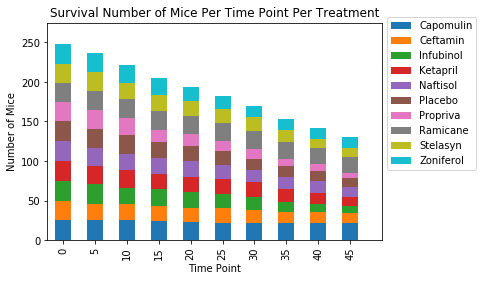

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

# '''cool method http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot'''
# tidy_data.groupby(['Timepoint','Drug Regimen']).size().unstack().plot(kind='bar',stacked=True)
# plt.show()

## Group by Timepoint and Drug Regimen
grouped_tidy = tidy_data.groupby(['Timepoint', 'Drug Regimen'])

## Count number of mice
num_mice = grouped_tidy['Mouse ID'].count()
num_mice = pd.DataFrame(num_mice)
num_mice = num_mice.rename(columns = {'Mouse ID' : 'Count'})

# Plot
num_mice.unstack().plot(kind = 'bar', y = 'Count', stacked=True)

plt.title('Survival Number of Mice Per Time Point Per Treatment')
plt.xlabel('Time Point')
plt.ylabel('Number of Mice')
plt.legend(bbox_to_anchor=(1, 1.05))
plt.xlim(-0.5, len(tidy_data['Timepoint'].unique()))
plt.ylim(0, 275)
plt.show()

Capomulin
Ceftamin
Infubinol
Ketapril
Naftisol
Placebo
Propriva
Ramicane
Stelasyn


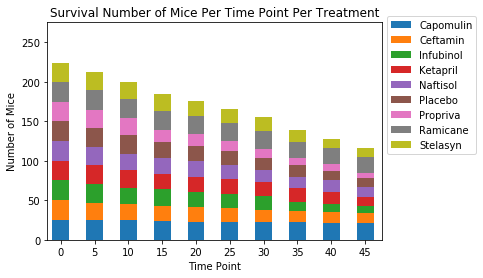

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = tidy_data['Timepoint'].unique()

plt_num_mice = num_mice.reset_index()

treatments = plt_num_mice['Drug Regimen'][0:9].unique()

bottom = [0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]

for tm in treatments:

    print(tm)
    
    y_axis = plt_num_mice.loc[plt_num_mice['Drug Regimen'] == tm, 'Count'].tolist() 
    plt.bar(x_axis, y_axis, label = tm, width=2.5, bottom = bottom)
    bottom = np.add(bottom, y_axis)
    
plt.title('Survival Number of Mice Per Time Point Per Treatment')
plt.xlabel('Time Point')
plt.ylabel('Number of Mice')
plt.legend(bbox_to_anchor=(1, 1.05))
plt.xlim(-2, 47.5)
plt.ylim(0, 275)
plt.xticks(x_axis, x_axis)
plt.show()


## Pie Plots

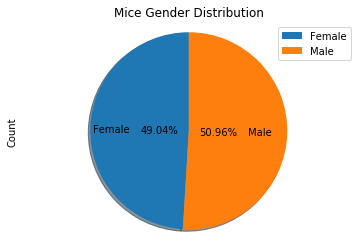

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_gender = tidy_data.groupby('Sex')
gender_dist = grouped_gender['Mouse ID'].count()
gender_df = pd.DataFrame(gender_dist)
gender_df = gender_df.rename(columns = {'Mouse ID' : 'Count'})

gender_df.plot(kind = 'pie', y = 'Count', autopct = "%1.2f%%", shadow = True, startangle = 90, pctdistance = 0.3, labeldistance = 0.6)
plt.title('Mice Gender Distribution')
plt.legend(loc = 'upper right')
plt.axis('equal')
plt.show()

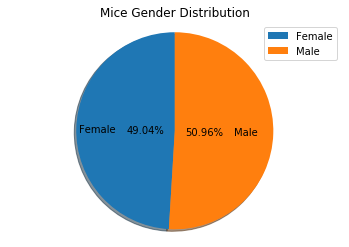

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

grouped_gender = tidy_data.groupby('Sex')
gender_dist = grouped_gender['Mouse ID'].count()

labels = gender_dist.keys().tolist()
sizes = gender_dist.tolist()
explode = (0, 0)

plt.pie(sizes, explode = explode, labels = labels, autopct = "%1.2f%%", shadow = True, startangle = 90, pctdistance = 0.3, labeldistance = 0.6)
plt.title('Mice Gender Distribution')
plt.legend(loc = 'upper right')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 

promising_tm = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter dataset to only promising_tm
filtered_data = tidy_data.loc[tidy_data['Drug Regimen'].isin(promising_tm)].copy()

# Sort filtered data by Mouse ID and then Timepoint
filtered_data = filtered_data.sort_values(['Mouse ID', 'Timepoint'])

# Finding the last tumor volume using drop duplicates
filtered_data = filtered_data.drop_duplicates(subset = 'Mouse ID', keep = 'last')

# Judgement call: Droping mice that only has Timepoint = 0 observation. I beleive these observations were initial tumor volume instead of final.
filtered_data = filtered_data.loc[filtered_data['Timepoint'] != 0].copy()

# Sort by Treatments
filtered_data = filtered_data.sort_values('Drug Regimen')

filtered_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1455,r157,Capomulin,Male,22,25,15,46.539206,0
440,i557,Capomulin,Female,1,24,45,47.685963,1
370,s710,Capomulin,Female,1,23,45,40.728578,1
164,t565,Capomulin,Female,20,17,45,34.455298,0
317,j246,Capomulin,Female,21,21,35,38.753265,1


In [40]:
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.
for tm in promising_tm:
    quartiles = tm + '_quartiles'
    exec(f"{quartiles} = filtered_data.loc[filtered_data['Drug Regimen'] == '{tm}', 'Tumor Volume (mm3)'].quantile([.25,.5,.75])")
    
    exec(f"{tm}_lowerq = {tm}_quartiles[0.25]")
    exec(f"{tm}_upperq = {tm}_quartiles[0.75]")
    exec(f"{tm}_irq    = {tm}_upperq - {tm}_lowerq")
    exec(f"{tm}_lower_bound = {tm}_lowerq - (1.5 * {tm}_irq)")  
    exec(f"{tm}_upper_bound = {tm}_upperq + (1.5 * {tm}_irq)")     
    
    exec(f"{tm}_data = filtered_data.loc[(filtered_data['Drug Regimen'] == '{tm}')].copy()")   
    
    exec(f"{tm}_outlier= {tm}_data.loc[({tm}_data['Tumor Volume (mm3)']  < {tm}_lower_bound) | ({tm}_data['Tumor Volume (mm3)'] > {tm}_upper_bound)]")
    
    
    print(tm)
    exec(f"print({tm}_lowerq, {tm}_upperq, {tm}_irq, {tm}_lower_bound, {tm}_upper_bound)")
    
    exec(f"{tm}_outlier")
    
    #print(quartiles)

Capomulin
32.37735684 40.1592203 7.781863460000004 20.70456164999999 51.83201549
Ramicane
31.56046955 40.65900627 9.098536719999998 17.912664470000003 54.30681135
Infubinol
54.04860769 65.52574285 11.477135160000003 36.83290494999999 82.74144559000001
Ceftamin
56.05774909 64.63494887 8.57719978 43.19194942 77.50074854


In [43]:

Infubinol_outlier

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
669,c326,Infubinol,Female,18,25,5,36.321346,0


In [ ]:
# # Capomuli
# Capomulin_lowerq = Capomulin_quartiles[0.25]
# Capomulin_upperq = Capomulin_quartiles[0.75]
# Capomulin_irq    = Capomulin_upperq - Capomulin_lowerq
# Capomulin_lower_bound = Capomulin_lowerq - (1.5 * Capomulin_irq)
# Capomulin_upper_bound = Capomulin_upperq + (1.5 * Capomulin_irq)

# Capomuli_data = filtered_data.loc[(filtered_data['Drug Regimen'] == 'Capomulin')].copy()

# Capomulin_outliner = Capomuli_data.loc[(Capomuli_data['Tumor Volume (mm3)']  < Capomulin_lower_bound) | 
#                                         (Capomuli_data['Tumor Volume (mm3)']  > Capomulin_upper_bound)
#                                        ]
# Capomulin_outliner

In [ ]:
# # Ramicane
# Ramicane_lowerq = Ramicane_quartiles[0.25]
# Ramicane_upperq = Ramicane_quartiles[0.75]
# Ramicane_irq    = Ramicane_upperq - Ramicane_lowerq
# Ramicane_lower_bound = Ramicane_lowerq - (1.5 * Ramicane_irq)
# Ramicane_upper_bound = Ramicane_upperq + (1.5 * Ramicane_irq)

# Ramicane_data = filtered_data.loc[(filtered_data['Drug Regimen'] == 'Ramicane')].copy()

# Ramicane_outliner = Ramicane_data.loc[(Ramicane_data['Tumor Volume (mm3)']  < Ramicane_lower_bound) | 
#                                         (Ramicane_data['Tumor Volume (mm3)']  > Ramicane_upper_bound)
#                                        ]
# Ramicane_outliner

In [ ]:
# # Ceftamin
# Ceftamin_lowerq =Ceftamin_quartiles[0.25]
# Ceftamin_upperq = Ceftamin_quartiles[0.75]
# Ceftamin_irq    = Ceftamin_upperq - Ceftamin_lowerq
# Ceftamin_lower_bound = Ceftamin_lowerq - (1.5 * Ceftamin_irq)
# Ceftamin_upper_bound = Ceftamin_upperq + (1.5 * Ceftamin_irq)

# Ceftamin_data = filtered_data.loc[(filtered_data['Drug Regimen'] == 'Ceftamin')].copy()

# Ceftamin_outliner = Ceftamin_data.loc[(Ceftamin_data['Tumor Volume (mm3)']  < Ceftamin_lower_bound) | 
#                                         (Ceftamin_data['Tumor Volume (mm3)']  > Ceftamin_upper_bound)
#                                        ]
# Ceftamin_outliner

In [ ]:
# # Infubinol
# Infubinol_lowerq =Infubinol_quartiles[0.25]
# Infubinol_upperq = Infubinol_quartiles[0.75]
# Infubinol_irq    = Infubinol_upperq - Infubinol_lowerq
# Infubinol_lower_bound = Infubinol_lowerq - (1.5 * Infubinol_irq)
# Infubinol_upper_bound = Infubinol_upperq + (1.5 * Infubinol_irq)

# Infubinol_data = filtered_data.loc[(filtered_data['Drug Regimen'] == 'Infubinol')].copy()

# Infubinol_outliner = Infubinol_data.loc[(Infubinol_data['Tumor Volume (mm3)']  < Infubinol_lower_bound) | 
#                                         (Infubinol_data['Tumor Volume (mm3)']  > Infubinol_upper_bound)
#                                        ]
# Infubinol_outliner

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
